In [67]:
import pandas as pd

In [68]:
dt = pd.read_excel('Bank_model.xlsx',sheet_name=1)

In [69]:
dt

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [70]:
#finding relations between 2 variables
dt1 = dt.drop(['ID','ZIP Code'],axis=1)
dt1.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [71]:
#now we are going to apply correlation between personal loan and age
#construct hypothesis

from scipy.stats import pearsonr
stats,p = pearsonr(dt1["Personal Loan"], dt1["Age"])
print(stats,p)
# correlation is negatively corerelated, p value >.05

-0.007725617173534105 0.5849592637165111


In [72]:
#here we accept the null hypothesis (p value >.05 )
# h0: no relation between personal loan and age
# h1: relation between personal loan and age

In [73]:
stats,p = pearsonr(dt1["Personal Loan"], dt1["Experience"])
print(stats,p)
# accept null hypothesis
# No significant diff between personal loan and experince

-0.00741309807677031 0.6002358831756374


In [74]:
stats,p = pearsonr(dt1["Personal Loan"], dt1["Income"])
print(stats,p)
#positively correlated(null hypothesis rejected p<.05)

0.5024622924949382 3.560286e-318


In [75]:
stats,p = pearsonr(dt1["Personal Loan"], dt1["Education"])
print(stats,p)
#null hypo is rejected, positively correlated

0.13672155003028252 2.709663193624357e-22


In [76]:
stats,p = pearsonr(dt1["Personal Loan"], dt1["Mortgage"])
print(stats,p)
#H0 : is also rejected , positively related

0.1420952363278853 5.730341721669223e-24


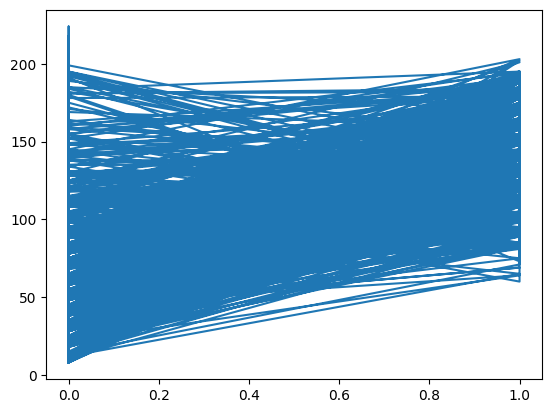

In [77]:
import matplotlib.pyplot as plt
plt.plot(dt1["Personal Loan"],dt1["Income"])

# values are upward direction that means positively correlated


In [78]:
#if we draw the correlation matrix using core function
dt1.corr()
# correlation_matrix=dt1.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.050089,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.013152,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [79]:
import statsmodels.api as sm

In [93]:
#apply logistic regrresion
# cuz we having categoriacal variable
Y= dt1["Personal Loan"]  #dependent variable 
X = dt1[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']]  #independent variable

# X1 = sm.add_constant(X) 

# Logistic=sm.Logit(Y,X1) #logit is fxn name of logistic regression
# result = Logistic.fit()

In [84]:

X1 = sm.add_constant(X) 

In [95]:
Logistic=sm.Logit(Y,X1)

In [96]:
result = Logistic.fit()  


PerfectSeparationError: Perfect separation detected, results not available

In [90]:
result.summary()  

NameError: name 'result' is not defined

In [97]:
from firthlogist import load_endometrial
import statsmodels.api as sm
# >>> X, y, feature_names = load_endometrial()
# >>> log_reg = sm.Logit(y, X).fit()

ModuleNotFoundError: No module named 'firthlogist'